In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("../house_data_colombo_with_cluster_feature.csv")

X = df.drop('price', axis = 1)
y = df['cluster']

#Standardizing the features

X = StandardScaler().fit_transform(X)

# Components selection in PCA

pca = PCA(0.95)
pca.fit(X)
print('Optimal number of components: ' ,pca.n_components_)

Optimal number of components:  5


In [34]:
# 2 Components

pca = PCA(n_components=2)


principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['cluster']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,cluster
0,-1.115169,-0.621122,0
1,0.500049,-0.537725,0
2,-0.226217,-0.503160,0
3,1.234308,-0.687107,0
4,0.881936,0.240669,0


[0.45146923 0.19119006]


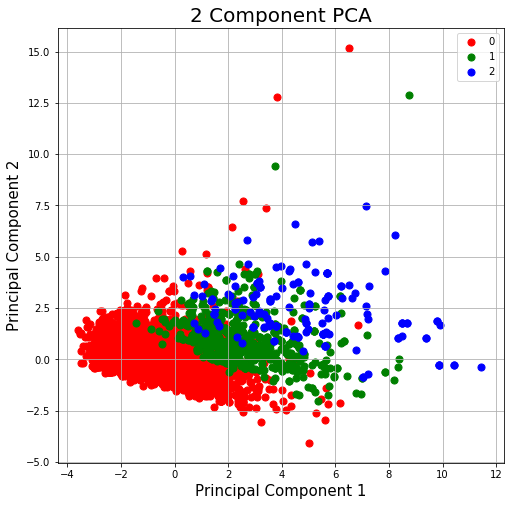

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print('Explained variance ratio: ', pca.explained_variance_ratio_)

In [8]:
# 3 Components

pca = PCA(n_components=3)


principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['cluster']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,cluster
0,-1.115169,-0.621122,0.543382,0
1,0.500049,-0.537725,-0.338672,0
2,-0.226217,-0.503160,-0.048989,0
3,1.234308,-0.687107,-0.464330,0
4,0.881936,0.240669,-2.007485,0


[0.45146923 0.19119006 0.15497468]


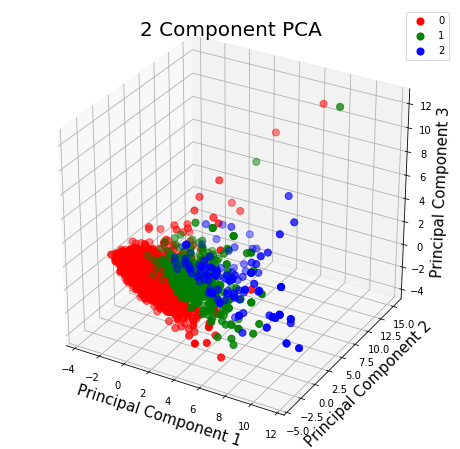

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
plt.axes(projection='3d')
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)